In [22]:
from scipy.signal import *
import numpy as np
import math
import matplotlib.pyplot as plt

## Set Parameters
> `ntaps`: Number of filter taps to use  
> `fc`: normalized cutoff frequency of low-pass filter (from 0 to 1)  
> `sig_length`: number of samples for signal  

In [112]:
ntaps = 100
fc = 0.1
sig_length = 100000

### Generate Coefficients

In [113]:
x = np.random.randn(sig_length)
b = firwin(ntaps, fc, pass_zero=True)

### Perform Filtering and Time
> Note: If you use the `%%timeit` magic, results will not be global to the jupyter notebook  
> Note 2: Scipy.signal uses `C/C++` under the hood, so will be much faster than native `Python` code

In [114]:
%%time
filtered = lfilter(b, [1.0], x)

CPU times: user 3.15 ms, sys: 68 µs, total: 3.22 ms
Wall time: 3.02 ms


### Plot Results

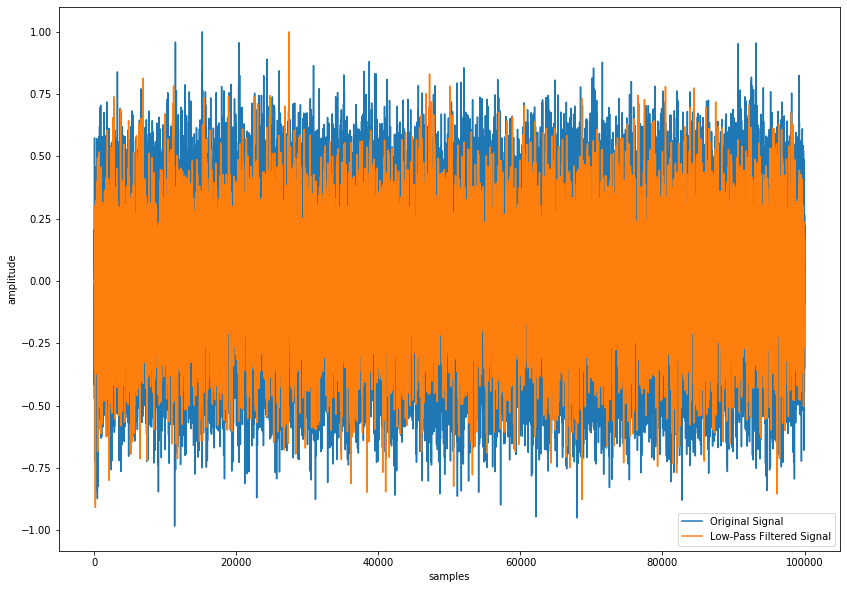

In [118]:
fig, ax = plt.subplots(figsize=(14, 10))
plt.plot(x / x.max())
plt.plot(filtered / filtered.max())
plt.legend(["Original Signal", "Low-Pass Filtered Signal"])
plt.xlabel("samples")
plt.ylabel("amplitude")
plt.show()

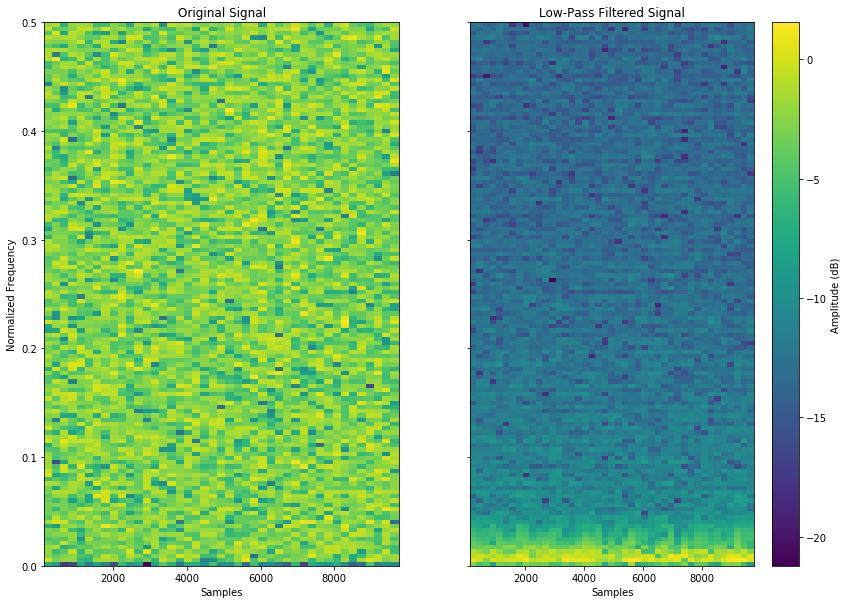

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 10))
mesh1 = ax1.pcolormesh(t, f, np.log(S_original))
ax1.set_title("Original Signal")
mesh2 = ax2.pcolormesh(t, f, np.log(S_filtered))
ax2.set_title("Low-Pass Filtered Signal")
ax1.set_xlabel("Samples")
ax2.set_xlabel("Samples")
ax1.set_ylabel("Normalized Frequency")
fig.colorbar(mesh2, label="Amplitude (dB)")